# Credit Card Risk Classification

---

## Modules and Setup

In [230]:
import os as os
from IPython.display import Markdown, display
import numpy as np
import pandas.api.types as ptypes
import pandas as pd
from scipy.stats import norm
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt 

---

## 1. Project Overview

This project involves developing a machine learning model to classify individuals as low or high credit risks based on their attributes. Using a publicly available dataset, the goal is to accurately predict credit risk while exploring the underlying data and applying advanced modeling techniques.

---

## 2. Objectives

1. Perform exploratory data analysis (EDA) to understand the dataset and identify patterns
2. Preprocess and clean the data to prepare it for modeling
3. Build, evaluate, and compare multiple classification models
4. Interpret model results and provide further understanding of credit risk

---

## 3. Dataset

The [German Credit Risk](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data) includes attributes related to individuals' financial history and demographics, with a target variable indicating whether they are a low or high credit risk.

---

## 4. Workflow

### 4.1. Loading and Tidying the Data

In [175]:
credit_risk = fetch_ucirepo(id=144) 
X_coded = credit_risk.data.features 
y_coded = credit_risk.data.targets

In [176]:
X_coded.head() # Display the features of the dataset

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [177]:
y_coded.head() # Labels

,class
0,1
1,2
2,1
3,1
4,2


In [178]:
rows, cols = X_coded.shape
text = f"The DataFrame contains **{rows} rows** and **{cols} columns**."
display(Markdown(text))

The DataFrame contains **1000 rows** and **20 columns**.

In [179]:
X_coded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1000 non-null  

The DataFrame has no missing values, but all of the variables are encoded. All categorical variables will be decoded.

### 4.1.1 Decoding the Variables

The values will be decoded based on their definitions in the *german* Word document. Since each attribute is unique to its respective column, all mappings will be combined into a single comprehensive dictionary. The qualitative labels will be shortened for clarity and conciseness.

In [180]:
attribute1_mapping = {
    "A11": "<0 DM",               # Less than 0 DM
    "A12": "0<= ...<200 DM",      # Between 0 and 200 DM
    "A13": ">=200 DM",            # Greater than or equal to 200 DM or salary commitments
    "A14": "No checking account"  # No checking account
}

attribute3_mapping = {
    "A30": "No credits/perfect",    # No credits or perfect repayment
    "A31": "Perfect at bank",       # Perfect repayment at this bank
    "A32": "Good repayment",        # Good current repayment
    "A33": "Delays",                # History of delays
    "A34": "Critical/other credits" # High-risk or external credits
}

attribute4_mapping = {
    "A40": "New car",
    "A41": "Used car",
    "A42": "Furniture/equipment",
    "A43": "Radio/TV",
    "A44": "Appliances",
    "A45": "Repairs",
    "A46": "Education",
    "A47": "Vacation (not used)",
    "A48": "Retraining",
    "A49": "Business",
    "A410": "Others"
}

attribute6_mapping = {
    "A61": "<100 DM",        # Less than 100 DM
    "A62": "100-499 DM",     # Between 100 and 499 DM
    "A63": "500-999 DM",     # Between 500 and 999 DM
    "A64": ">=1000 DM",      # 1000 DM or more
    "A65": "Unknown/None"    # Unknown or no savings account
}

attribute7_mapping = {
    "A71": "Unemployed",    # No current employment
    "A72": "<1 year",       # Less than 1 year
    "A73": "1-3 years",     # Between 1 and 3 years
    "A74": "4-6 years",     # Between 4 and 6 years
    "A75": ">=7 years"      # 7 years or more
}

attribute9_mapping = {
    "A91": "Male: divorced/separated",  # Male, divorced or separated
    "A92": "Female: divorced/married",  # Female, divorced, separated, or married
    "A93": "Male: single",              # Male, single
    "A94": "Male: married/widowed",     # Male, married or widowed
    "A95": "Female: single"             # Female, single
}

attribute10_mapping = {
    "A101": "None",          # No other debtors or guarantors
    "A102": "Co-signer",     # Co-signer is involved
    "A103": "Guarantor"      # Guarantor is involved
}

attribute12_mapping = {
    "A121": "Real estate",            # Owns real estate
    "A122": "Savings/life insurance", # Building society savings or life insurance (if not real estate)
    "A123": "Car/other property",     # Car or other property (if not real estate or savings)
    "A124": "Unknown/None"            # No property or unknown
}

attribute14_mapping = {
    "A141": "Bank",    # Installment plan through a bank
    "A142": "Stores",  # Installment plan through stores
    "A143": "None"     # No installment plan
}

attribute15_mapping = {
    "A151": "Rent",       # Renting a property
    "A152": "Own",        # Owns a property
    "A153": "For free"    # Lives for free (e.g., provided housing)
}

attribute17_mapping = {
    "A171": "Unemployed/non-resident",      # Unemployed or unskilled, non-resident
    "A172": "Unskilled/resident",           # Unskilled but resident
    "A173": "Skilled employee",             # Skilled employee or official
    "A174": "Management/highly qualified",  # Management, self-employed, or highly qualified
}

attribute19_mapping = {
    "A191": "None",       # No telephone
    "A192": "Yes",        # Registered Telephone
}

attribute20_mapping = {
    "A201": "Yes",  # Is a foreign worker
    "A202": "No"    # Is not a foreign worker
}

y_mapping = {
    1 : 'Low Risk',   # Individuals with good credit 
    2 : 'High Risk'   # Indididuals with bad credit
}


The dictionaries will be combined together into a single dictionary

In [181]:
all_attributes_mapping = (
    attribute1_mapping
    | attribute3_mapping
    | attribute4_mapping
    | attribute6_mapping
    | attribute7_mapping
    | attribute9_mapping
    | attribute10_mapping
    | attribute12_mapping
    | attribute14_mapping
    | attribute15_mapping
    | attribute17_mapping
    | attribute19_mapping
    | attribute20_mapping
)

The targets will be decoded.

In [182]:
y = y_coded['class'].map(y_mapping).copy()
y


0       Low Risk
1      High Risk
2       Low Risk
3       Low Risk
4      High Risk
         ...    
995     Low Risk
996     Low Risk
997     Low Risk
998    High Risk
999     Low Risk
Name: class, Length: 1000, dtype: object

Decoding all non-numerical features:

In [183]:
def df_decode(df:pd.DataFrame, dict:dict) -> pd.DataFrame:
    '''
    Replaces the values of the Dataframe with the ones within the dictionary
    parameters:
    df - A pandas dataframe
    dict - A non-nested dictionary with the values to replace key values
    Returns: A DataFrame
    '''
    df2 = df.copy()
    for i in range(0, df2.shape[1]):
        if ptypes.is_object_dtype(df.iloc[:, i]):
            df2.iloc[:, i] = df.iloc[:, i].map(dict)
    return df2

In [184]:
X = df_decode(df = X_coded, dict = all_attributes_mapping)
X.head(n = 10)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,<0 DM,6,Critical/other credits,Radio/TV,1169,Unknown/None,>=7 years,4,Male: single,None,4,Real estate,67,None,Own,2,Skilled employee,1,Yes,Yes
1,0<= ...<200 DM,48,Good repayment,Radio/TV,5951,<100 DM,1-3 years,2,Female: divorced/married,None,2,Real estate,22,None,Own,1,Skilled employee,1,None,Yes
2,No checking account,12,Critical/other credits,Education,2096,<100 DM,4-6 years,2,Male: single,None,3,Real estate,49,None,Own,1,Unskilled/resident,2,None,Yes
3,<0 DM,42,Good repayment,Furniture/equipment,7882,<100 DM,4-6 years,2,Male: single,Guarantor,4,Savings/life insurance,45,None,For free,1,Skilled employee,2,None,Yes
4,<0 DM,24,Delays,New car,4870,<100 DM,1-3 years,3,Male: single,None,4,Unknown/None,53,None,For free,2,Skilled employee,2,None,Yes
5,No checking account,36,Good repayment,Education,9055,Unknown/None,1-3 years,2,Male: single,None,4,Unknown/None,35,None,For free,1,Unskilled/resident,2,Yes,Yes
6,No checking account,24,Good repayment,Furniture/equipment,2835,500-999 DM,>=7 years,3,Male: single,None,4,Savings/life insurance,53,None,Own,1,Skilled employee,1,None,Yes
7,0<= ...<200 DM,36,Good repayment,Used car,6948,<100 DM,1-3 years,2,Male: single,None,2,Car/other property,35,None,Rent,1,Management/highly qualified,1,Yes,Yes
8,No checking account,12,Good repayment,Radio/TV,3059,>=1000 DM,4-6 years,2,Male: divorced/separated,None,4,Real estate,61,None,Own,1,Unskilled/resident,1,None,Yes
9,0<= ...<200 DM,30,Critical/other credits,New car,5234,<100 DM,Unemployed,4,Male: married/widowed,None,2,Car/other property,28,None,Own,2,Management/highly qualified,1,None,Yes


The columns will be renamed for clarity:

In [185]:
attribute_names = [
    "CheckingAccountStatus",  # Status of existing checking account
    "LoanDurationMonths",     # Duration of the loan in months
    "CreditHistory",          # Credit history
    "LoanPurpose",            # Purpose of the loan
    "CreditAmount",           # Credit amount
    "SavingsAccountBonds",    # Savings account or bonds
    "EmploymentDuration",     # Present employment duration
    "InstallmentRate",        # Installment rate (% of disposable income)
    "PersonalStatusSex",      # Personal status and sex
    "OtherDebtorsGuarantors", # Other debtors or guarantors
    "ResidenceDuration",      # Present residence duration
    "PropertyOwnership",      # Property ownership
    "AgeYears",               # Age in years
    "OtherInstallmentPlans",  # Other installment plans
    "HousingStatus",          # Housing
    "ExistingCredits",        # Number of existing credits at this bank
    "JobType",                # Job type
    "Dependents",             # Number of dependents
    "Telephone",              # Telephone availability
    "ForeignWorker"           # Foreign worker status
]
X.columns = attribute_names
X.head()

,CheckingAccountStatus,LoanDurationMonths,CreditHistory,LoanPurpose,CreditAmount,SavingsAccountBonds,EmploymentDuration,InstallmentRate,PersonalStatusSex,OtherDebtorsGuarantors,ResidenceDuration,PropertyOwnership,AgeYears,OtherInstallmentPlans,HousingStatus,ExistingCredits,JobType,Dependents,Telephone,ForeignWorker
0,<0 DM,6,Critical/other credits,Radio/TV,1169,Unknown/None,>=7 years,4,Male: single,None,4,Real estate,67,None,Own,2,Skilled employee,1,Yes,Yes
1,0<= ...<200 DM,48,Good repayment,Radio/TV,5951,<100 DM,1-3 years,2,Female: divorced/married,None,2,Real estate,22,None,Own,1,Skilled employee,1,None,Yes
2,No checking account,12,Critical/other credits,Education,2096,<100 DM,4-6 years,2,Male: single,None,3,Real estate,49,None,Own,1,Unskilled/resident,2,None,Yes
3,<0 DM,42,Good repayment,Furniture/equipment,7882,<100 DM,4-6 years,2,Male: single,Guarantor,4,Savings/life insurance,45,None,For free,1,Skilled employee,2,None,Yes
4,<0 DM,24,Delays,New car,4870,<100 DM,1-3 years,3,Male: single,None,4,Unknown/None,53,None,For free,2,Skilled employee,2,None,Yes


In [186]:
X.duplicated().sum() # No duplicate rows

np.int64(0)

In [187]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CheckingAccountStatus   1000 non-null   object
 1   LoanDurationMonths      1000 non-null   int64 
 2   CreditHistory           1000 non-null   object
 3   LoanPurpose             1000 non-null   object
 4   CreditAmount            1000 non-null   int64 
 5   SavingsAccountBonds     1000 non-null   object
 6   EmploymentDuration      1000 non-null   object
 7   InstallmentRate         1000 non-null   int64 
 8   PersonalStatusSex       1000 non-null   object
 9   OtherDebtorsGuarantors  1000 non-null   object
 10  ResidenceDuration       1000 non-null   int64 
 11  PropertyOwnership       1000 non-null   object
 12  AgeYears                1000 non-null   int64 
 13  OtherInstallmentPlans   1000 non-null   object
 14  HousingStatus           1000 non-null   object
 15  Exist

No missing values in the table and all Dtype are correct for all of the columns.

---

### 4.2. Exploratory Data Analysis (EDA)

### 4.2.1. Overview of the Dataset

Numerical summary of the features for the dataset:

In [188]:
X.describe()

,LoanDurationMonths,CreditAmount,InstallmentRate,ResidenceDuration,AgeYears,ExistingCredits,Dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Categorical summary of the features:

In [189]:
X.describe(include = np.object_)

,CheckingAccountStatus,CreditHistory,LoanPurpose,SavingsAccountBonds,EmploymentDuration,PersonalStatusSex,OtherDebtorsGuarantors,PropertyOwnership,OtherInstallmentPlans,HousingStatus,JobType,Telephone,ForeignWorker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,No checking account,Good repayment,Radio/TV,<100 DM,1-3 years,Male: single,None,Car/other property,None,Own,Skilled employee,None,Yes
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


In [191]:
t1 = X.describe(include = np.object_)
t1.loc['Ratio_of_tio'] = t1.iloc[3, :] / t1.iloc[0, :]
t1

,CheckingAccountStatus,CreditHistory,LoanPurpose,SavingsAccountBonds,EmploymentDuration,PersonalStatusSex,OtherDebtorsGuarantors,PropertyOwnership,OtherInstallmentPlans,HousingStatus,JobType,Telephone,ForeignWorker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,No checking account,Good repayment,Radio/TV,<100 DM,1-3 years,Male: single,None,Car/other property,None,Own,Skilled employee,None,Yes
freq,394,530,280,603,339,548,907,332,814,713,630,596,963
Ratio_of_tio,0.394,0.53,0.28,0.603,0.339,0.548,0.907,0.332,0.814,0.713,0.63,0.596,0.963


There appear to be several categorial class  that dominate for some of the different features within the dataset.

### 4.2.2 Target Variable Analysis

The target variable will be analyzed to determine its distribution.

In [216]:
figures_folder = os.path.join(os.getcwd(), r'outputs/visuals/') # Assumes cwd directory is the top directory of the project

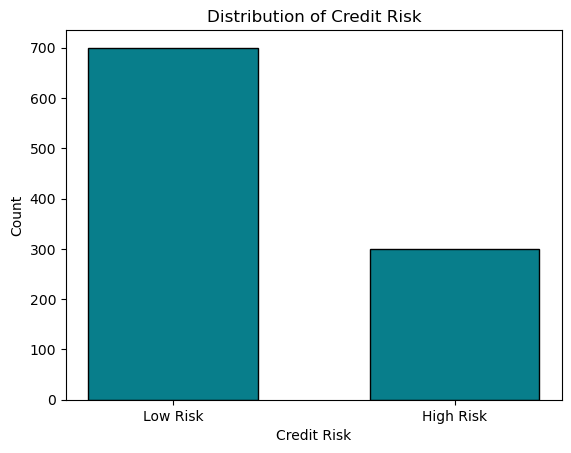

In [218]:
plt.bar(x = y.value_counts().index , height = y.value_counts().values, 
        width = 0.6, 
        color = '#087E8B',
        edgecolor = 'black')
plt.xlabel(xlabel = 'Credit Risk')
plt.ylabel(ylabel = 'Count')
plt.title(label = 'Distribution of Credit Risk')

file_path = os.path.join(figures_folder, 'Target_variable_distribution.png')
plt.savefig(file_path)

plt.show();

There is a 70/30 split between low-risk and high-risk individuals, indicating an unbalanced dataset. According to the data documentation, misclassifying high-risk individuals as low-risk should incur a higher penalty compared to misclassifying low-risk individuals as high-risk. This imbalance will be addressed when developing the models.

### 4.2.3 Univariate Analysis

In [219]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CheckingAccountStatus   1000 non-null   object
 1   LoanDurationMonths      1000 non-null   int64 
 2   CreditHistory           1000 non-null   object
 3   LoanPurpose             1000 non-null   object
 4   CreditAmount            1000 non-null   int64 
 5   SavingsAccountBonds     1000 non-null   object
 6   EmploymentDuration      1000 non-null   object
 7   InstallmentRate         1000 non-null   int64 
 8   PersonalStatusSex       1000 non-null   object
 9   OtherDebtorsGuarantors  1000 non-null   object
 10  ResidenceDuration       1000 non-null   int64 
 11  PropertyOwnership       1000 non-null   object
 12  AgeYears                1000 non-null   int64 
 13  OtherInstallmentPlans   1000 non-null   object
 14  HousingStatus           1000 non-null   object
 15  Exist

#### 4.2.3.1 Numerical Variables

The following will be an assessment of the numerical features of the dataset, with the purpose of identifying skewness, outliers, or unusual distributions

##### 4.2.3.1.1. LoanDurationMonths

In [221]:
X['LoanDurationMonths'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: LoanDurationMonths, dtype: float64

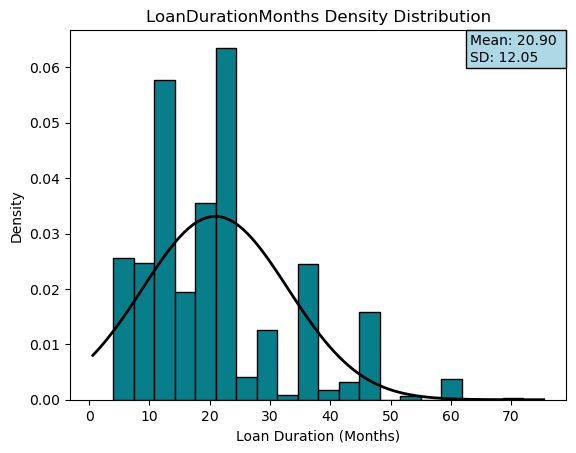

In [278]:
plt.hist(x = X['LoanDurationMonths'], bins = 20, color = '#087E8B', edgecolor = 'black', density = True)

mu, std = norm.fit(X['LoanDurationMonths']) # Calculating mean and standard deviation
xmin, xmax = plt.xlim()
x = np.linspace(start = xmin, stop = xmax, num = 100)
p = norm.pdf(x, mu, std) # PDF for normal distribution
plt.plot(x, p, 'k', linewidth = 2)

plt.xlabel(xlabel = 'Loan Duration (Months)')
plt.ylabel(ylabel = 'Density')
plt.title(label = 'LoanDurationMonths Density Distribution')
plt.figtext(x = 0.75, 
            y = 0.815, 
            s = f'Mean: {mu:.2f} \nSD: {std:.2f}', 
            fontsize=10, 
            bbox = dict(boxstyle='square', facecolor='lightblue', edgecolor='black', alpha=1))

plt.show();


In [254]:
import matplotlib
print(matplotlib.__version__)

3.9.2


##### 4.2.3.1.2. CreditAmount

##### 4.2.3.1.3. InstallmentRate

##### 4.2.3.1.4. ResidenceDuration 

##### 4.2.3.1.5. AgeYears

##### 4.2.3.1.6. ExistingCredits

##### 4.2.3.1.7. Dependents

#### 4.2.3.2. Categorical Features

##### 4.2.3.2.1. CheckingAccountStatus

##### 4.2.3.2.2. CreditHistory

##### 4.2.3.2.3. LoanPurpose

##### 4.2.3.2.4. SavingsAccountBonds

##### 4.2.3.2.5. EmploymentDuration 

##### 4.2.3.2.6. PersonalStatusSex

##### 4.2.3.2.7. OtherDebtorsGuarantors 

##### 4.2.3.2.8. PropertyOwnership  

##### 4.2.3.2.8. OtherInstallmentPlans

##### 4.2.3.2.9. HousingStatus 

##### 4.2.3.2.10. JobType

##### 4.2.3.2.11. Telephone

##### 4.2.3.2.12. ForeignWorker

### 4.2.4. Bivariate Analysis

---

### Data Preprocessing

---

### Model Development

---

### Model Evaluation

---

## Results

---

## Conclusions

---